 Principal Component Analysis

Github Link : 

In [1]:
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\guddi\Desktop\ML\irisdata.csv")
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
data.columns = ['SepalLengthCm','SepalWidthCm','PetalLenghtCm','PetalWidth','Species']

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLenghtCm,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [14]:
#sperating numbric data and text 
iris = np.array(data)
iris = iris[:,:-1]
iris = iris.astype(float)
iris_species = data[['Species']]
iris_species = np.array(iris_species)

In [15]:
#finding mean
mu = np.mean(iris.T, axis=1)
print(mu)

[5.84333333 3.054      3.75866667 1.19866667]


In [16]:
x = []
for i in iris:
    x.append(i-mu)
arrX = np.asarray(x)

In [17]:
print(arrX.shape)
tran_X = arrX.transpose()
print(tran_X.shape)

(150, 4)
(4, 150)


In [18]:
S = np.matmul(tran_X,arrX)

In [19]:
print(S)
type(S)

[[102.16833333  -5.851      189.77866667  77.01866667]
 [ -5.851       28.0126     -47.9352     -17.5792    ]
 [189.77866667 -47.9352     463.86373333 193.16173333]
 [ 77.01866667 -17.5792     193.16173333  86.77973333]]


numpy.ndarray

In [20]:
eig_val_cov, eig_vec_cov = np.linalg.eig(S)

In [69]:
print(eig_val_cov)

[629.50127448  36.09429217  11.70006231   3.52877104]


Here, 1st two features are more use full than other two 

   1. SepalLengthCm
   2. SepalWidthCm
   
   are useful

In [22]:
Q = eig_vec_cov[:,:2]
Q.shape

(4, 2)

In [27]:
Q.T

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [30]:
a=[]
for i in range(150):
    a.append(np.matmul(Q.T,arrX[i]))
    
A = np.array(a)

In [39]:
result = np.append(A,iris_species,axis=1)

### Before applying PCA

In [70]:
Iris_setosa = np.split(data,3)[0]
Iris_versicolor = np.split(data,3)[1]
Iris_virginica = np.split(data,3)[2]

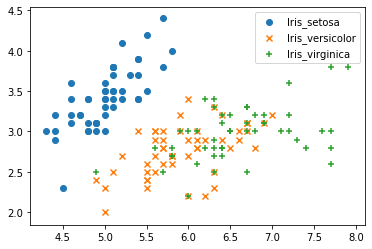

In [71]:
plt.scatter(Iris_setosa.iloc[:,:1], Iris_setosa.iloc[:,1:2], marker='o', label='Iris_setosa')
plt.scatter(Iris_versicolor.iloc[:,:1], Iris_versicolor.iloc[:,1:2], marker='x', label='Iris_versicolor')
plt.scatter(Iris_virginica.iloc[:,:1], Iris_virginica.iloc[:,1:2], marker='+', label='Iris_virginica')
plt.legend()
plt.show()

### After applying PCA

In [40]:
Iris_setosa = np.split(result,3)[0]
Iris_versicolor = np.split(result,3)[1]
Iris_virginica = np.split(result,3)[2]

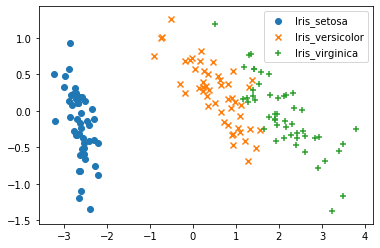

In [41]:
plt.scatter(Iris_setosa[:,0], Iris_setosa[:,1], marker='o', label='Iris_setosa')
plt.scatter(Iris_versicolor[:,0], Iris_versicolor[:,1], marker='x', label='Iris_versicolor')
plt.scatter(Iris_virginica[:,0], Iris_virginica[:,1], marker='+', label='Iris_virginica')
plt.legend()
plt.show()